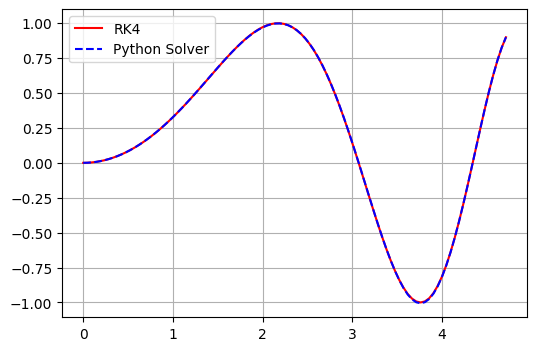

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def my_RK4(ds,t_span,s0):
    h = (t_span[-1] - t_span[0]) / (len(t_span) - 1)
    y = np.zeros(len(t_span))
    y[0] = s0
    for i in range(len(t_span)-1):
        k1 = ds(t_span[i], y[i])
        k2 = ds((t_span[i]+h/2), (y[i]+h*k1/2))
        k3 = ds((t_span[i]+h/2), (y[i]+h*k2/2))
        k4 = ds((t_span[i]+h), (y[i]+h*k3))
        y[i+1] = y[i] + ((k1+2*k2+2*k3+k4)*h)/6
    return [t_span, y]

f = lambda t, s: 2/3*t*np.cos(1/3*t**2)
t_span = np.linspace(0, 1.5*np.pi, 100)
s0 = 0
t, s = my_RK4(f, t_span, s0)

plt.figure(figsize=(6, 4))
plt.plot(t, s, "r-",label="RK4")
sol = solve_ivp(f, [0, 1.5*np.pi], [s0], t_eval=t_span)
plt.plot(sol.t, sol.y[0], "b--", label="Python Solver")
plt.legend()
plt.grid(True)

